In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dfw = pd.read_csv("../Csv/retrasos.csv")

Text(0.5, 0, 'Recuento')

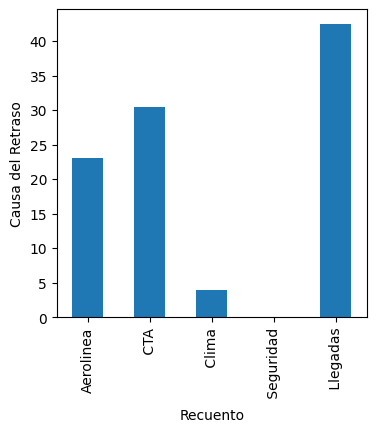

In [8]:
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_ylabel("Causa del Retraso")
ax.set_xlabel("Recuento")

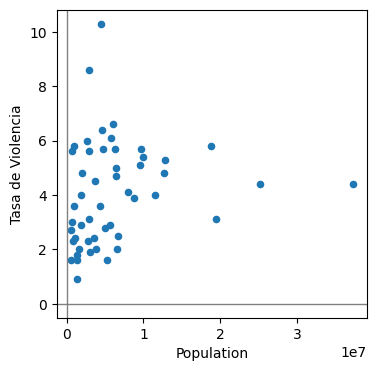

In [ ]:
#Generar un grafico de dispersion con pandas y pyth on

state = pd.read_csv("../Csv/state.csv")


ax = state.plot.scatter(x='Population', y='Murder.Rate', figsize=(4,4))
ax.set_xlabel("Population")
ax.set_ylabel("Tasa de Violencia")
ax.axhline(0, color ='grey', lw=1)
ax.axvline(0, color ='grey', lw=1)

In [5]:


kc_tax = pd.read_csv("../Csv/kc_tax.csv")

In [6]:
#Agrupacion Hexagonal en Python
kc_tax = kc_tax.loc[(kc_tax.TaxAssessedValue<750000) &
                      (kc_tax.SqFtTotLiving > 100) &
                      (kc_tax.SqFtTotLiving < 3500), :]
kc_tax.shape

(432693, 3)

Text(0, 0.5, 'Tax Assessed Value')

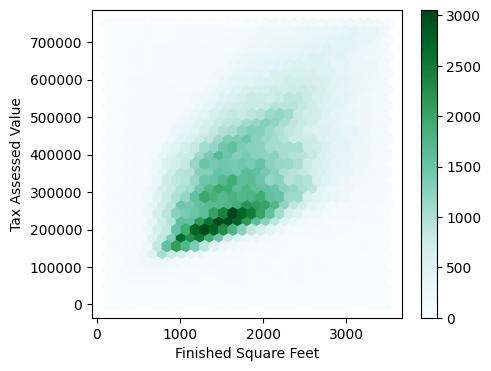

In [15]:
#Diagrama de Agrupacion Hexagonal en Python

ax = kc_tax.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                        gridsize=30, sharex = False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

In [ ]:
# Crear un diagrama de contorno con Python

ax = sns.kdeplot(data=kc_tax, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax Assessed Value")

In [ ]:
# Leer el archivo CSV "lc_loans.csv" y cargarlo en un DataFrame de Pandas
lc_loans = pd.read_csv("../Csv/lc_loans.csv")

# Crear una tabla dinámica (pivot table) que agrupa los datos por 'grade' (filas) y 'status' (columnas)
# La función de agregación cuenta el número de ocurrencias para cada combinación
# 'margins=True' añade una fila y columna "All" para mostrar los totales
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)

# Seleccionar las filas correspondientes a los grados 'A' a 'G' y crear una copia del subconjunto
df = crosstab.loc['A':'G', :].copy()

# Normalizar las columnas de estado específicas ('Charged Off' a 'Late') dividiendo cada valor
# por el total de la fila correspondiente (columna "All")
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)

# Normalizar la columna "All" dividiendo cada valor por la suma total de la columna
df['All'] = df['All'] / sum(df['All'])

# Guardar el DataFrame resultante, que ahora contiene proporciones en lugar de conteos, en la variable 'perc_crosstab'
perc_crosstab = df

C:\Users\Admin\AppData\Local\Temp\ipykernel_10356\436262453.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10356\436262453.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10356\436262453.py:7: FutureWarning: Setting an item of incompatible dt

Text(0.5, 0.98, '')

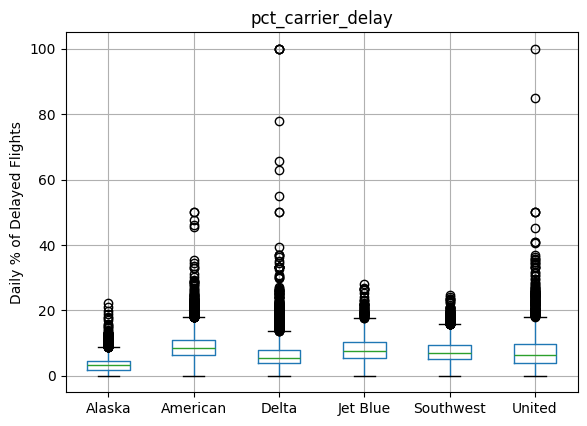

In [ ]:
#Crear un diagrama de cajas individual con Python

airline_stats = pd.read_csv("../Csv/airline_stats.csv")

ax = airline_stats.boxplot(by = 'airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Text(0, 0.5, 'Daily % of Delayed Flights')

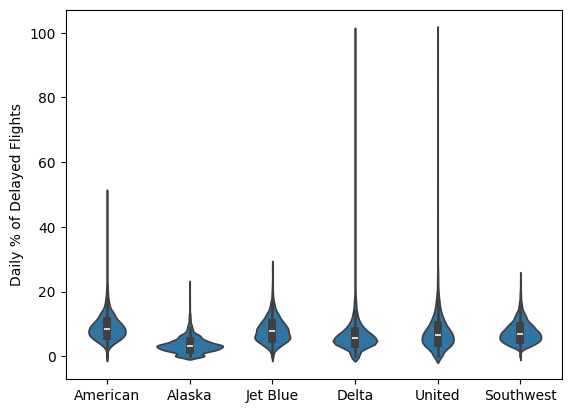

In [10]:
#Crear un diagrama de violin en Python

ax = sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

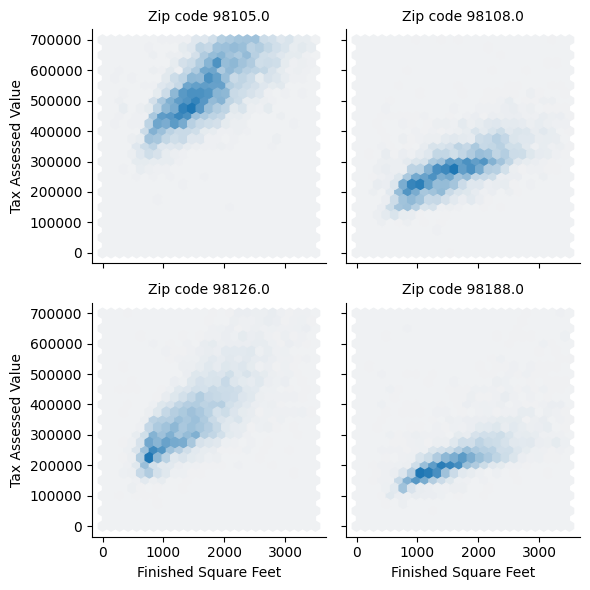

In [10]:
#Mostrar varios Diagramas en uno con Matplotlib y Seaborn

zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax.loc[kc_tax.ZipCode.isin(zip_codes), :]
kc_tax_zip

def hexbin (x,y,color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y,gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col = 'ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0,3500,0,700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name}')